# CS431 - CÁC KỸ THUẬT HỌC SÂU VÀ ỨNG DỤNG

**Hướng dẫn**:
- Khởi động kernel: Ở thanh menu, chọn Kernel$\rightarrow$Restart kernel.
- Hoàn tất tất cả các mục có comment `YOUR CODE HERE`
- Chạy toàn bộ các block code để kiểm tra: Ở thanh menu, chọn Cell$\rightarrow$Run All.

---

# CÀI ĐẶT MÔ HÌNH LOGISTIC REGRESSION VỚI KERAS

Một mô hình máy học cần có đủ ít nhất 7 phương thức sau:
- `__init__`: hàm constructor trong hướng đối tượng, được sử dụng để khởi tạo các tham số mặc định hoặc tham số bắt đầu một mô hình. Trong những bài tập đầu tiên, để đơn giản constructor sẽ không sử dụng.
- `build`: xây dựng kiến trúc của mô hình
- `train`: bắt đầu quá trình huấn luyện mô hình
- `save`: lưu lại mô hình sau khi đã huấn luyện
- `load`: load lên mô hình từ file đã huấn luyện (pretrained)
- `summary`: in tóm tắt kiến trúc mô hình
- `predict`: dự đoán giá trị output từ dữ liệu đầu vào

In [1]:
# Mô hình cài đặt tổng quát bao gồm 7 phương thức cơ bản
# Lưu ý: mô hình này chỉ mang tính gợi ý, không bắt buộc
# Tuy nhiên, trong phần bài tập cần tuân theo các tên phương thức này
class MyModel:
    # constructor
    def __init__(self):
        return None

    # Implement architecture of the model
    def build(self):
        return None

    # Train the defined model with training and validation data
    def train(self):
        return None

    # Save the trained model to file
    def save(self, model_path):
        return None

    # Load pretrained model from file
    def load(self):
        return None
    # Visualize your model
    def summary(self):
        return None

    # Apply your model with new input data
    def predict(self):
        return None

## 1. Import các thư viện Keras

Đầu tiên, ta sẽ import các thư viện, module, hàm của `Keras`:
- `Input`: để nhận dữ liệu đầu vào cho mô hình
- `Dense`: hay còn gọi là lớp Fully Connected (Lớp kết nối đầy đủ), một thành phần quan trọng của các mô hình dựa trên mạng Neural Network.
- `Model`: đây là lớp đối tượng mô hình được sử dụng để đóng gói lớp đầu vào, đầu ra, sau đó huấn luyện với phương thức `fit` và dự đoán kết quả với `predict`.
- `load_model`: hàm sử dụng để load mô hình lên từ file

In [2]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model

## 2. Cài đặt mô hình Logistic Regression
Tiếp theo, ta sẽ dựa trên khung đối tượng `MyModel` đã trình bày ở mục trước để tiến hành cài đặt mô hình **Logistic Regression**. Phương thức chính mà bài tập này cần thực hiện là `def build()`. Các phương thức còn lại đã được cài đặt sẵn, các bạn cần đọc, hiểu ý nghĩa và cách thức sử dụng về sau.

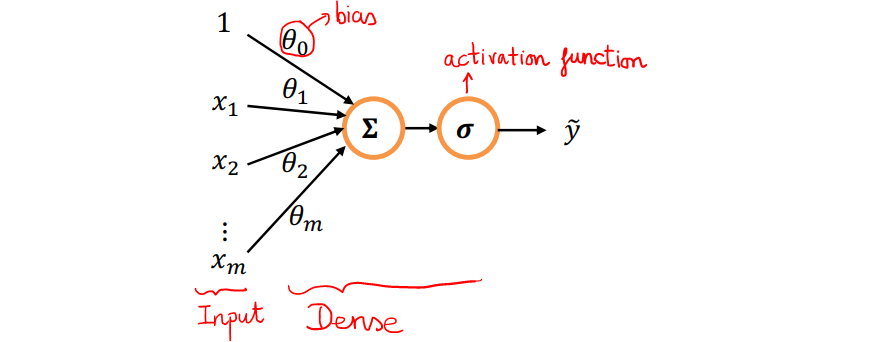

In [3]:
# Logistic Regression
class LogisticRegression:
    def __init__(self): # Self is similar to your 'this' pointer in C++
        return None

    def build(self, input_dim):

        self.model = None
        # Hãy cài đặt để định nghĩa KIẾN TRÚC MÔ HÌNH và lưu ở thuộc tính `self.model`
        # với các biến đối tượng sau:
        #  - tạo biến `input` với lớp đối tượng `Input` của Keras,
        #    truyền vào kích thước đầu vào `input_dim`
        #  - tạo biến `output` với lớp đối tượng `Dense` của Keras,
        #    truyền vào các tham số:  kích thước output, có sử dụng bias,
        #    CÓ SỬ DỤNG hàm activation là `sigmoid`
        # Sau bước này, self.model sẽ đóng gói 2 biến `input` và `output` để tạo thành mô hình

        # YOUR CODE HERE
        input_layer = Input(shape=(input_dim,))
        output = Dense(1, use_bias=True, activation='sigmoid')(input_layer)
        self.model = Model(input_layer, output)
        #raise NotImplementedError()


        #self.model = Model(input, output)
        return self.model

    def train(self, x_train, y_train):
        opt = tf.keras.optimizers.SGD(learning_rate=0.1) # Stochastic Gradient Descent
        self.model.compile(optimizer=opt, loss='binary_crossentropy') # BCE loss
        return self.model.fit(x_train, y_train, epochs=50)

    def save(self, model_file):
        return self.model.save(model_file)

    def load(self, model_file):
        self.model = load_model(model_file)

    def summary(self):
        self.model.summary()

    def predict(self, x_test):
        return self.model.predict(x_test)

    def get_weights(self):
        return self.model.layers[1].get_weights()

Tiếp theo, ta sẽ khởi tạo đối tượng LogisticRegression và kiểm tra thử xem phương `build` đã cài đặt chính xác chưa.

In [4]:
lr = LogisticRegression()
# Trong ví dụ này, ta sẽ khởi tạo input là một vector 1000 chiều:
lr.build(1000)
lr.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 1001 (3.91 KB)
Trainable params: 1001 (3.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Kiểm tra kiến trúc mạng gồm 2 lớp: Input và Output
assert len(lr.model.layers)==2
assert str(type(lr.model.layers[0])).endswith("input_layer.InputLayer'>") == True
assert str(type(lr.model.layers[1])).endswith("core.dense.Dense'>") == True
assert lr.model.layers[0].input_shape[0][1] == 1000
assert lr.model.layers[1].activation(0.0).numpy() == 0.5


In [6]:
# Kiểm tra với bộ test ẩn

## 3. Tạo dữ liệu mẫu (toy example)
Bước tiếp theo, ta sẽ tiến hành tạo mẫu dữ liệu để huấn luyện và kiểm thử.

Dữ liệu được tạo ra là 02 cụm điểm ngẫu nhiên xung quanh hai tâm cụm:
- [1, 5]
- [5, 1]

Lưu ý rằng, hai điểm này đủ cách xa để khi các điểm ngẫu nhiên phát sinh không giao thoa với nhau.

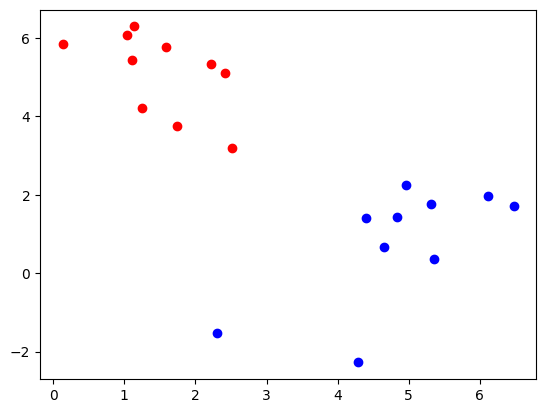

In [7]:
import numpy as np
import matplotlib.pyplot as plt

n_sample = 10

# Tạo bộ dữ  liệu gồm 2 tập đỏ và xanh
red_points = np.random.randn(n_sample, 2) + np.array([[1,5]])
blue_points = np.random.randn(n_sample, 2) + np.array([[5,1]])
x_train = np.concatenate((red_points, blue_points))
y_train = np.concatenate((np.ones(n_sample), np.zeros(n_sample)))

# Tạo tập dữ liệu validation
red_points_test = np.random.randn(n_sample, 2) + np.array([[1,5]])
blue_points_test = np.random.randn(n_sample, 2) + np.array([[5,1]])
x_test = np.concatenate((red_points_test, blue_points_test))
y_test = np.concatenate((np.ones(n_sample), np.zeros(n_sample)))

# Trực quan hóa dữ liệu bằng các hình tròn màu đỏ, xanh
plt.plot(red_points[:,0], red_points[:,1], 'ro')
plt.plot(blue_points[:,0], blue_points[:,1], 'bo')


In [8]:
len(x_train)

20

In [9]:
y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [10]:
lr = LogisticRegression()

# Hãy gọi phương thức `build` cho đối tượng `lr` và truyền tham số đầu vào
# tương ứng với dữ liệu train đã phát sinh ở code block trên
# Theo bạn, `input_dim` bằng bao nhiêu?

# YOUR CODE HERE

lr.build(2)
#raise NotImplementedError()


# Để hiển thị kiến trúc của mô hình ta gọi phương thức `summary`
print("Kiến trúc của mô hình Logistic Regression: ")
lr.summary()

Kiến trúc của mô hình Logistic Regression: 
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Kiểm tra bước gọi phương thức `build`
assert len(lr.model.layers)==2
assert str(type(lr.model.layers[0])).endswith("input_layer.InputLayer'>") == True
assert str(type(lr.model.layers[1])).endswith("core.dense.Dense'>") == True
assert lr.model.layers[0].input_shape[0][1] == 2
assert lr.model.layers[1].activation(0.0).numpy() == 0.5
assert lr.model.layers[1].units == 1
assert lr.model.layers[1].use_bias == True

In [12]:
# Để huấn luyện mô hình ta gọi phương thức `train` với dữ liệu mẫu đã tạo được
# Nếu bước `build` mô hình gọi đúng thì bước `train` sau sẽ thực hiện thành công
#x_train = np.array(x_train)
#x_train = x_train.reshape((x_train.shape[0],2))

#y_train = np.array(y_train)
#y_train = y_train.reshape((y_train.shape[0],1))
hist = lr.train(x_train, y_train)

Epoch 1/50
1/1 [==============================] - 1s 569ms/step - loss: 3.6040
Epoch 2/50
1/1 [==============================] - 0s 13ms/step - loss: 2.9468
Epoch 3/50
1/1 [==============================] - 0s 11ms/step - loss: 2.3136
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 1.7249
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 1.2218
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.8533
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6213
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.4798
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3889
Epoch 10/50
1/1 [==============================] - 0s 11ms/step - loss: 0.3270
Epoch 11/50
1/1 [==============================] - 0s 11ms/step - loss: 0.2825
Epoch 12/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2493
Epoch 13/50
1/1 [==============================] - 0s 9ms/step

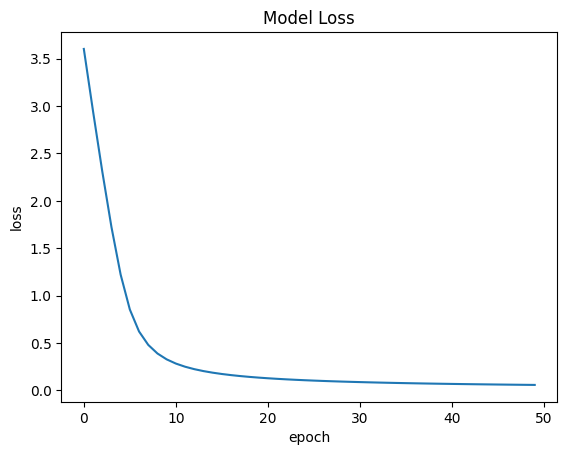

In [13]:
# Hiển thị loss theo số epoch
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [14]:
# Sau khi đã huấn luyện, ta lưu mô hình về để sau này tái sử dụng
# Lưu ý: hai phương thức lưu mô hình `save` và tải mô hình lên 'load'
# được sử dụng khi muốn tái sử dụng nhiều lần mà KHÔNG CẦN PHẢI HUẤN LUYỆN LẠI
lr.save('logistic_regression_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 5. Trực quan hóa mô hình và dự đoán với dữ liệu test

In [15]:
# Khởi tạo đối tượng mới và gọi phương thức load mô hình từ file
pretrain_lr = LogisticRegression()
pretrain_lr.load('logistic_regression_model.h5')

In [16]:
theta = pretrain_lr.get_weights()
print('Tham số tối ưu: ')
print(theta)
bias = theta[1][0] # bias chính là theta0 trong mô hình gốc
theta1 = theta[0][0][0]
theta2 = theta[0][1][0]
print('Trong đó: ')
print('   - bias (hệ số tự do) : ', bias)
print('   - theta1 (hệ số cho dữ liệu x1): ', theta1)
print('   - theta2 (hệ số cho dữ liệu x2): ', theta2)

Tham số tối ưu: 
[array([[-0.843162 ],
       [ 0.9509994]], dtype=float32), array([0.06290481], dtype=float32)]
Trong đó: 
   - bias (hệ số tự do) :  0.06290481
   - theta1 (hệ số cho dữ liệu x1):  -0.843162
   - theta2 (hệ số cho dữ liệu x2):  0.9509994


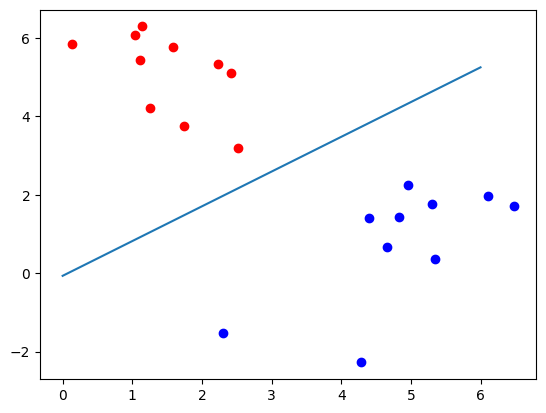

In [17]:
# Trực quan hóa dữ liệu và mô hình sau khi huấn luyện
plt.plot(red_points[:,0], red_points[:,1], 'ro')
plt.plot(blue_points[:,0], blue_points[:,1], 'bo')

# Trực quan hóa đường thẳng phân lớp 2 tập đỏ, xanh
# Khoảng giá trị nhỏ nhất và lớn nhất mà x1 có thể nhận được từ 0-6
x1=[0, 6]
# Tính giá trị x2 dựa trên phương trình đường thẳng:
# theta1*x1 + theta2*x2 + bias = 0
# => x2 = -(theta1*x1 + bias)/theta2
x2=[-(theta1*x1[0]+bias)/theta2, -(theta1*x1[-1]+bias)/theta2]
plt.plot(x1, x2)
plt.show()

Như vậy ta có thể thấy rằng, các hệ số đã huấn luyện tương ứng đã tạo thành phương trình đường thẳng chia tách các điểm huấn luyện đỏ và xanh.

In [18]:
# Sai số trung bình khi thử nghiệm trên  tập test:
y_pred = lr.predict(x_test)[:,0]
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print('Giá trị nhãn dự đoán trên tập test: ')
print(y_pred)
print('Giá trị nhãn phát sinh (tập test): ')
print(y_test)

1/1 [==============================] - 0s 166ms/step
Giá trị nhãn dự đoán trên tập test: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Giá trị nhãn phát sinh (tập test): 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Như ta đã thấy, giá trị dự đoán `y_pred` **gần như chính xác** so với dữ liệu phát sinh `y_test`. Sẽ có tình huống `y_pred` không khớp với `y_test`, phụ thuộc vào yếu tố nhiễu khi tạo sinh dữ liệu.

Để tính tổng độ chính xác (Accuracy), ta đếm tổng số mẫu mà giá trị dự đoán khớp với giá trị phát sinh, sau đó chia cho tổng số mẫu:

In [19]:
def accuracy(y_pred, y_test):
    acc = None
    # Cài đặt biến `acc` chứa độ chính xác theo %
    # với công thức tính bằng tổng số mẫu dự đoán đúng
    # (`y_pred` và `y_test` khớp nhau) chia cho tổng số mẫu
    # của tập test.
    # Lưu ý: giá trị nhỏ nhất là 0%, lớn nhất là 100%

    # YOUR CODE HERE
    correct_predictions = sum([1 for pred, actual in zip(y_pred, y_test) if pred == actual])

    # Calculate accuracy percentage
    acc = (correct_predictions / len(y_test)) * 100
    #raise NotImplementedError()


    return acc

In [20]:
print("Độ chính xác trên tập test: ", accuracy(y_pred, y_test), "(%)")

Độ chính xác trên tập test:  100.0 (%)


In [21]:
# Kiểm tra với một số bộ test mở
assert accuracy(np.array([1, 1]), np.array([0, 1])) == 50.0
assert accuracy(np.array([1, 0, 1]), np.array([0, 1, 0])) == 0.0

In [22]:
# Kiểm tra với bộ test ẩn
assert accuracy(np.array([1]), np.array([1])) == 100.0
assert accuracy(np.array([1]), np.array([0])) == 0.0
assert abs(accuracy(np.array([0, 1, 1]), np.array([0, 1, 0])) - 200/3.0) < 0.00001
assert accuracy(np.array([1]), np.array([0])) == 0.0